# Análisis de Componentes Principales
## 1. Resumen
Los grandes conjuntos de datos son cada vez más comunes y, a menudo, difíciles de interpretar. El análisis de componentes principales (PCA por sus siglas en inglés) es una técnica para reducir la dimensionalidad de tales conjuntos de datos, aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información. 

Cuando implementamos PCA trabajamos bajo el supuesto de que todas las variables no son iguales de importantes para realizar nuestro análisis. Usualmente sucede que algunas de ellas tienen poca variación por lo que aportan muy poca información o también puede haber conjuntos de variables que estén altamente correlacionadas y por ende la información que aporten sea redundante. 

Por tal motivo, este algoritmo busca representar un conjunto de datos es un espacio de menor dimensión, reteniendo la mayor cantidad de información posible. Idealmente el número de dimensiones resultante deberá ser sustancialmente menor al de la matriz original. Más adelante verá algunas técnicas utilizadas para escoger el número óptimo de dimensiones.

Matemáticamente el planteamiento del problema parte de un conjunto de datos alojado en una matriz $X$ con $p$ columnas/variables numéricas y $n$ observaciones. PCA busca la combinación lineal de las columnas de $X$ tal que se maximice la varianza. Esta combinación lineal está dada por:
$$\sum_{i=1}^p a_ix_i=Xa$$
En donde $a$ es un vector de constantes $a_1, a_2, \cdots, a_p$. Además, recordemos que la varianza de una combinación lineal en forma matricial sería: $var(Xa)=a^{T}Sa$, en donde $S$ sería la matriz de varianzas y covarianzas muestral asociada a $X$.

Recapitulando tenemos que encontrar una combinación lineal que maximice la varianza sería equivalente a encontrar un vector $a$ de dimensión $p$ tal que maximice la forma cuadrática $a^{T}Sa$. Dado que este problema tiene infinitas soluciones es necesario imponer la restricción de que el vector $a$ deba ser un vector unitario, es decir: $a^{T}a=1$. Planteando el lagrangeano obtendríamos:
$$\mathcal{L} = a^{T}Sa-\lambda(a^{T}a-1)$$
Donde $\lambda$ corresponde al multiplicado de lagrange. Hayando las condiciones de primer orden llegamos a la expresión:
$$Sa-\lambda a=0 \leftrightarrow Sa=\lambda a$$

Finalmente, se puede demostrar que $a$ y $\lambda$ deben corresponder a un eigenvector y a un eigenvalor asociados a la matriz $S$ respectivamente. Dado que cualquier matriz simétrica de tamaño $p\times p$ tiene exactamente $p$ eigenvalores, vamos a ordenarlos de mayor a menor (en valor absoluto) y de este modo se tendrán también ordenados los eigenvectores del que explica la mayor porción de la varianza a la menor porción.

---
## 2. Ejercicio práctico
Para el siguiente ejercicio práctico haremos uso de una base de datos que contiene información sobre el gasto promedio de 12 familias en Francia sobre 7 artículos de la canasta básica. Esta base de datos fue utilizada por Lebart, Morineau y Fénelon (1982) y se encuentra disponible [aquí](http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode133.html).

Nuestro objetivo es reducir nuestra base en solo dos dimensiones de modo que podamos hacer una representación gráfica de la misma y hacer un análisis sobre el comportamiento de consumo de las familias y de los productos.

Dado que la información de la base se encuentra en formato html, haremos un scraper sencillo para importar los datos. No es necesario que entienda a profundidad lo que sucede en la próxima celda.

In [1]:
import pandas as pd

# Url donde está alojada la base
link = "http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode133.html"
# Leemos la tabla con pandas
df = pd.read_html(link)[0]
# Limpiamos la tabla 
df = df.iloc[1:13,1:].reset_index(drop = True)
df.columns = ["familia", "pan", "vegetales", "frutas", "carne", "aves", "leche", "vino"]
df = df.set_index("familia")
df = df.apply(pd.to_numeric)

In [2]:
# Visualizamos la data
df

,pan,vegetales,frutas,carne,aves,leche,vino
familia,,,,,,,
MA2,332,428,354,1437,526,247,427
EM2,293,559,388,1527,567,239,258
CA2,372,767,562,1948,927,235,433
MA3,406,563,341,1507,544,324,407
EM3,386,608,396,1501,558,319,363
CA3,438,843,689,2345,1148,243,341
MA4,534,660,367,1620,638,414,407
EM4,460,699,484,1856,762,400,416
CA4,385,789,621,2366,1149,304,282


La columna familia nos dice el tipo de familia, donde MA significa artesanos, EM significa empleados, y CA significa gerentes. Seguido de este indicador viene un número que es equivalente al número de hijos que tiene la familia.

Primero vamos a realizar una implementación manual de PCA y posteriormente mostraremos como realizarlo utilizando las funciones de la librería [scikit-learn](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html?highlight=principal).

Los pasos a seguir para implementar PCA son:
- Estandarizamos los datos para que estos estén centrados en 0 y tengan desviación estándar igual a 1.
- Calculamos la matriz $S$ de varianzas y covarianzas. 
- Encontramos los eigenvalores y eigenvectores asociados. Ordenamos los eigenvalores del mayor al menor en valor absoluto.
- Construimos los Componentes Principales.
- Seleccionamos el número óptimo de Componentes Principales.

In [3]:
# Estandarizamos los datos
mu = df.mean()
sigma = df.std()
X = (df - mu)/sigma

In [4]:
# Calculamos la matriz de varianzas y covarianzas
S = X.cov()
S

,pan,vegetales,frutas,carne,aves,leche,vino
pan,1.000000,0.593110,0.196139,0.321269,0.248008,0.855575,0.303761
vegetales,0.593110,1.000000,0.856250,0.881081,0.826777,0.662799,-0.356468
frutas,0.196139,0.856250,1.000000,0.959477,0.925542,0.332189,-0.486281
carne,0.321269,0.881081,0.959477,1.000000,0.981785,0.374591,-0.437235
aves,0.248008,0.826777,0.925542,0.981785,1.000000,0.232892,-0.400157
leche,0.855575,0.662799,0.332189,0.374591,0.232892,1.000000,0.006880
vino,0.303761,-0.356468,-0.486281,-0.437235,-0.400157,0.006880,1.000000


Note que como la media es 0, la covarianza muestral es igual a $\frac{1}{N-1} X^TX$

In [5]:
S = X.T.dot(X)/11
S

,pan,vegetales,frutas,carne,aves,leche,vino
pan,1.000000,0.593110,0.196139,0.321269,0.248008,0.855575,0.303761
vegetales,0.593110,1.000000,0.856250,0.881081,0.826777,0.662799,-0.356468
frutas,0.196139,0.856250,1.000000,0.959477,0.925542,0.332189,-0.486281
carne,0.321269,0.881081,0.959477,1.000000,0.981785,0.374591,-0.437235
aves,0.248008,0.826777,0.925542,0.981785,1.000000,0.232892,-0.400157
leche,0.855575,0.662799,0.332189,0.374591,0.232892,1.000000,0.006880
vino,0.303761,-0.356468,-0.486281,-0.437235,-0.400157,0.006880,1.000000


Adicionalmente, note que como escalamos dividiendo por la desviación estándar, la matriz varcov es igual a la matriz de correlación. 

Por tal motivo en algunos libros la matriz S representa la matriz de correlación. En este caso no sería necesario estandarizar los datos pues la correlación de pearson es invariante a la escala de los datos.

In [6]:
S = X.corr()
S

,pan,vegetales,frutas,carne,aves,leche,vino
pan,1.000000,0.593110,0.196139,0.321269,0.248008,0.855575,0.303761
vegetales,0.593110,1.000000,0.856250,0.881081,0.826777,0.662799,-0.356468
frutas,0.196139,0.856250,1.000000,0.959477,0.925542,0.332189,-0.486281
carne,0.321269,0.881081,0.959477,1.000000,0.981785,0.374591,-0.437235
aves,0.248008,0.826777,0.925542,0.981785,1.000000,0.232892,-0.400157
leche,0.855575,0.662799,0.332189,0.374591,0.232892,1.000000,0.006880
vino,0.303761,-0.356468,-0.486281,-0.437235,-0.400157,0.006880,1.000000


<AxesSubplot:>

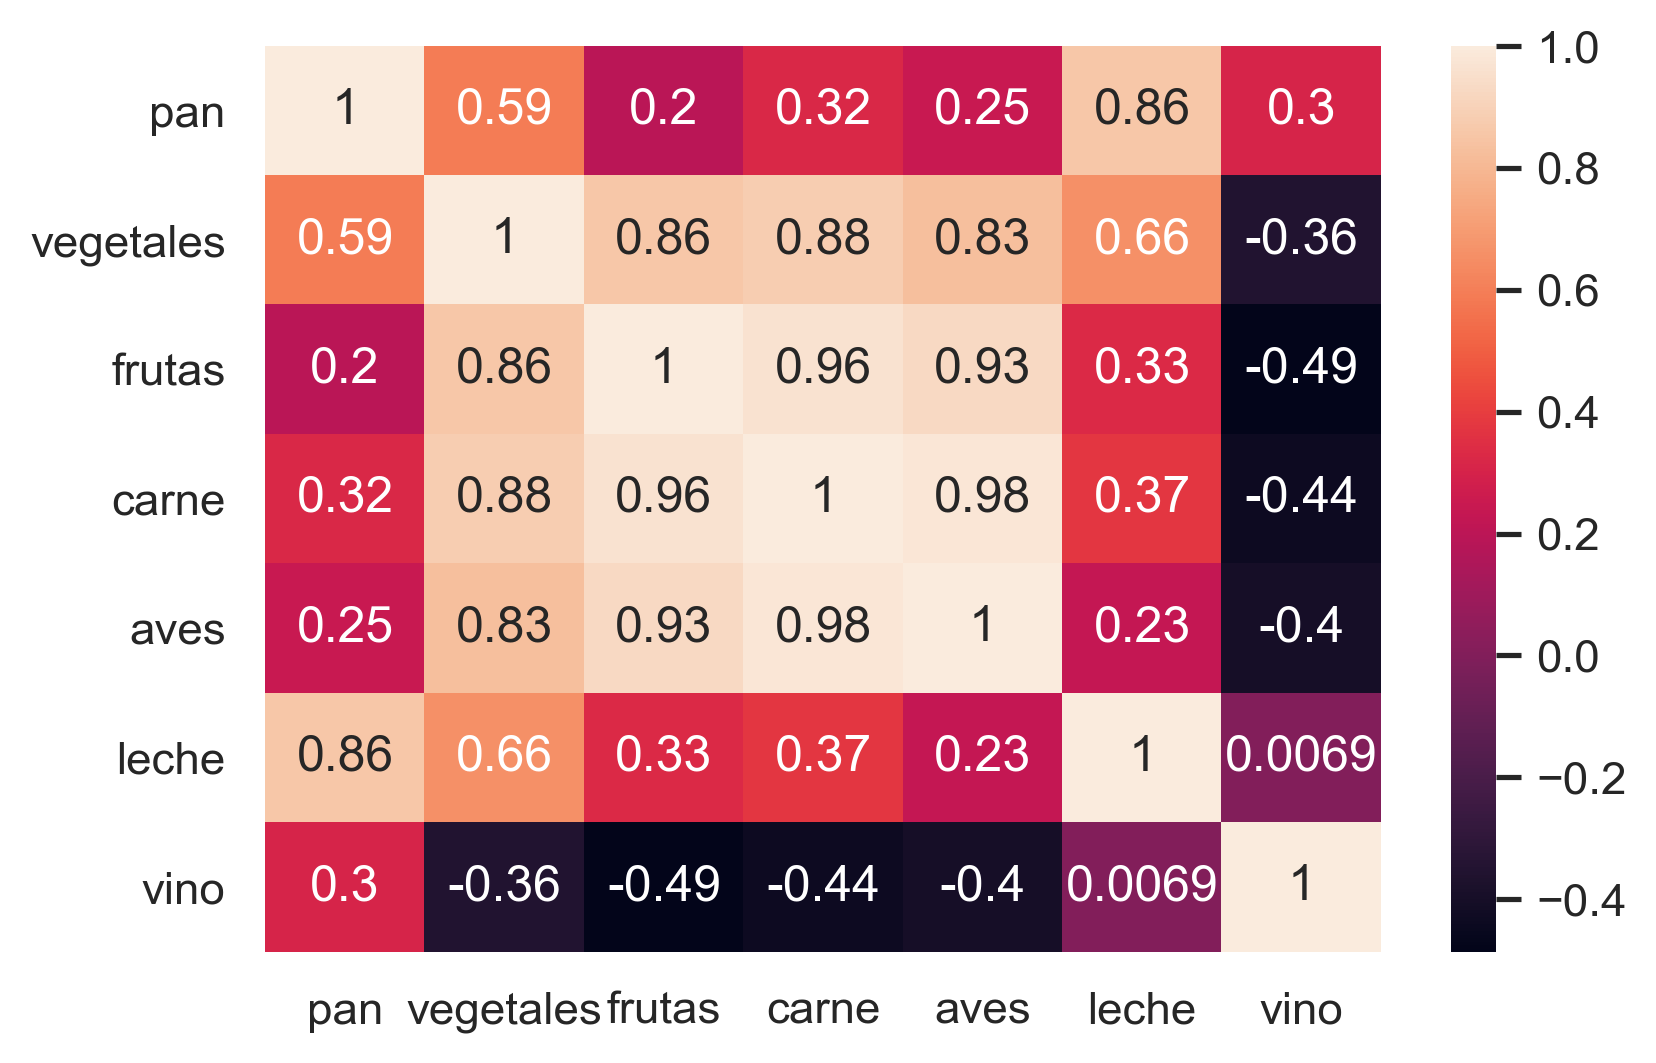

In [7]:
# Visualizamos la correlación entre productos
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {"figure.dpi": 300})

sns.heatmap(S, annot = True)

Se puede ver que la carne, las aves y las frutas están altamente correlacionadas. Sin embargo, con PCA podremos visualizar estas relaciones de forma más directa. 

Ahora que tenemos la matriz simétrica $S$ encontramos los eigenvalores/eigenvectores

In [8]:
import numpy as np 

w, v = np.linalg.eig(S)

In [9]:
# Eigenvalores
w

array([4.33323732e+00, 1.83029017e+00, 6.30836424e-01, 1.28327501e-01,
       5.75561897e-02, 1.88486021e-02, 9.03796789e-04])

In [10]:
# Matriz de eigenvectores
pd.DataFrame(v)

,0,1,2,3,4,5,6
0,-0.239583,-0.622095,-0.010858,0.543678,-0.036345,0.507945,-0.023775
1,-0.465856,-0.098381,-0.062147,0.023001,0.808712,-0.301009,0.155839
2,-0.446345,0.205422,0.145397,-0.547573,0.066881,0.625461,-0.204762
3,-0.462181,0.141232,0.207341,0.053285,-0.411091,-0.092550,0.736920
4,-0.437755,0.196540,0.355897,0.324387,-0.223787,-0.349677,-0.604565
5,-0.280713,-0.522511,-0.443539,-0.449600,-0.341134,-0.332051,-0.150617
6,0.205703,-0.479091,0.780064,-0.306338,0.068860,-0.138156,0.044565


Para construir nuestro componente principal $z_i$ debemos multiplicar nuestra matriz original $X$ por el eigenvector $a_i$. De modo que para hallar todos los $p$ componentes principales solo debemos realizar la operación $Z=X a$ en donde $Z$ es la matriz de componentes principales ordenados del más importante al menos importante.

In [11]:
# Construimos nuestros Componentes Principales
cp = X.dot(v).reset_index(drop = True)

Ahora vamos a ver qué tanta varianza explican cada uno de los componentes principales a partir de los eigenvalores.

In [12]:
var_exp = pd.DataFrame(100*w/w.sum()) \
    .assign(var = lambda x: (100*x/x.sum()).cumsum(), e = list(range(1, 8)))
var_exp.columns = ["Varianza explicada", 
    "Varianza explicada (acumulada)", "Eigenvalor"]
var_exp

,Varianza explicada,Varianza explicada (acumulada),Eigenvalor
0,61.903390,61.903390,1
1,26.147002,88.050393,2
2,9.011949,97.062342,3
3,1.833250,98.895592,4
4,0.822231,99.717823,5
5,0.269266,99.987089,6
6,0.012911,100.000000,7


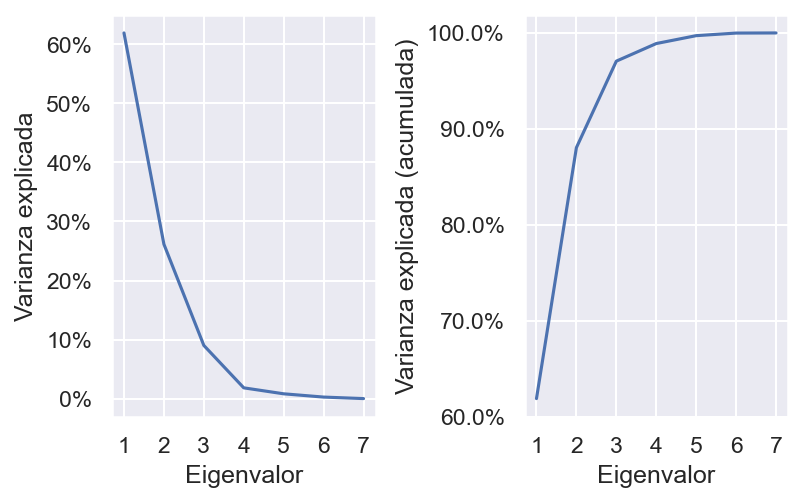

In [13]:
import matplotlib.ticker as mtick

# Calidad del gráfico
sns.set(rc = {"figure.dpi": 150})
# Dos gráficos en uno (una fila, dos columnas)
fig, ax = plt.subplots(1,2)
# Distancia horizontal entre gráficos
fig.tight_layout(pad = 3)
# Marcas del eje x
plt.setp(ax, xticks = range(1, 8))

# Gráfico 1
g1 = sns.lineplot(data = var_exp, x = "Eigenvalor", y = "Varianza explicada", 
    ax = ax[0])
# Eje y en porcentaje
g1.axes.yaxis.set_major_formatter(mtick.PercentFormatter())

# Gráfico 2
g2 = sns.lineplot(data = var_exp, x = "Eigenvalor", y = "Varianza explicada (acumulada)", 
    ax = ax[1])
# Eje y en porcentaje
g2.axes.yaxis.set_major_formatter(mtick.PercentFormatter())

Note que cada eigenvalor explica algo de la varianza en la base de datos, pero en la medida que cogemos un eigenvalor de menor tamaño, este aporta marginalmente menos que el eigenvector anterior. Los primeros dos eigenvectores explican el 88% de la variación total y con 3 eigenvectores logramos explicar al rededor del 97% de la base. 

Cuando queremos visualizar nuestros resultados, el número óptimo de Componentes Principales será 2 y 3. Sin embargo, si deseamos utilizar estas variables en algún modelo de aprendizaje de maquinas, se puede escoger el número óptimo de componentes utilizando la gráfica de la izquierda (también conocida como la gráfica del codo) y seleccionar hasta el eigenvector donde se parte la curva y el aumento de varianza explicada es marginal. En este caso podría ser 3 o 4. 

Algunas personas escogen el número óptimo de componentes principales haciendo validación cruzada, sin embargo esto solo es recomendable cuando el número de otros hiperparámetros a escoger sea bajo. 

Finalmente, representaremos nuestra base de datos en tan solo dos dimensiones:

In [14]:
import plotly.express as px
cp.columns = ["Componente principal " + str(i) for i in range(1,8)]
fig = px.scatter(cp/np.sqrt(2), x = "Componente principal 1", y = "Componente principal 2",
    text = df.index.values)
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 500, title_text = 'Familias en R2')
fig.update_yaxes(range = [-2, 2])
fig.update_xaxes(range = [-2, 2])

Este tipo de gráficos se puede interpretar de la siguiente manera. Aquellos puntos que están agrupados y cercanos los unos de los otros en ambas dimensiones, significan que son grupos altamente correlacionados. Aquellos puntos que se encuentran cerca en una dimensión pero lejos en la otra dimensión significa que tienen baja correlación. Los puntos que se encuentran distantes en ambas dimensiones, significan que se correlacionan negativamente.

En este caso significa que la familia CA5 y CA4 tienen consumos similares entre ellas por ejemplo.

In [15]:
fig = px.scatter_3d(cp, x = "Componente principal 1", y = "Componente principal 2", 
    z = "Componente principal 3",
    text = df.index.values)
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 500, title_text = 'Familias en R3')
fig.update_scenes(aspectratio = dict(x=1, y=1, z=1))

Una de las características interesantes de Componentes Principales es que no solo se pueden visualizar las observaciones sino también las columnas y así ver como se relacionan los productos en este caso. Para realizar esto solo es necesario trasponer la matriz original y repetir el proceso. 

En este caso usaremos el comando automático de scikit-learn.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estandarizamos la data
df2 = StandardScaler().fit_transform(df)
# Trasponemos la base estandarizada para hacer el análisis por columnas
X2 = df2.T 
# Sacamos todos los componentes principales
pca = PCA(n_components = len(X2))
cp2 = pca.fit_transform(X2)

In [20]:
cp2 = pd.DataFrame(cp2, columns = ["Componente principal " + str(i) for i in range(1, 8)])
fig = px.scatter(cp2, x = "Componente principal 1", y = "Componente principal 2",
    text = df.columns.values)
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 500, title_text = 'Productos en R2')
fig.update_yaxes(range = [-4, 4])
fig.update_xaxes(range = [-4, 4])

Finalmente, podemos concluir que la carne, las frutas y las aves están positivamente correlacionadas entre sí.

In [18]:
fig = px.scatter_3d(cp2, x = "Componente principal 1", y = "Componente principal 2", 
    z = "Componente principal 3",
    text = df.columns)
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 500, title_text = 'Productos en R3')
fig.update_scenes(aspectratio = dict(x=1, y=1, z=1))